In [2]:
%matplotlib inline
from ExpoSeq.pipeline import PlotManager

# Note: the figures will appear differently in the notebook compared to your python console for which the pipeline was designed.

In [3]:

plot = PlotManager(test_version = True,
                   test_exp_num = 10,
                   test_panrou_num=2) # this part is only for test purposes, normally you would just call: plot = PlotManager() . Here you just generate a random dataset to test the plotting functions
# Note: The dataset is purely sampled here, so the sequences are not typical HCDR3 sequences. This is just for testing purposes.


In [41]:
plot.print_samples() # identify the names of your samples
plot.print_antigens() # identify the names of your antigens

my_report = plot.sequencing_report# you can analyze your sequencing data yourself by taking the sequencing_report, which contains the collected information from mixcr, from the plot manager.
my_report.head(10)
my_report.to_csv("my_report.csv") # you can also save it as a csv file

['sample 0', 'sample 0 round 2', 'sample 1', 'sample 1 round 2', 'sample 2', 'sample 2 round 2', 'sample 3', 'sample 3 round 2', 'sample 4', 'sample 4 round 2']
['Antibody 0', 'Antibody 1']


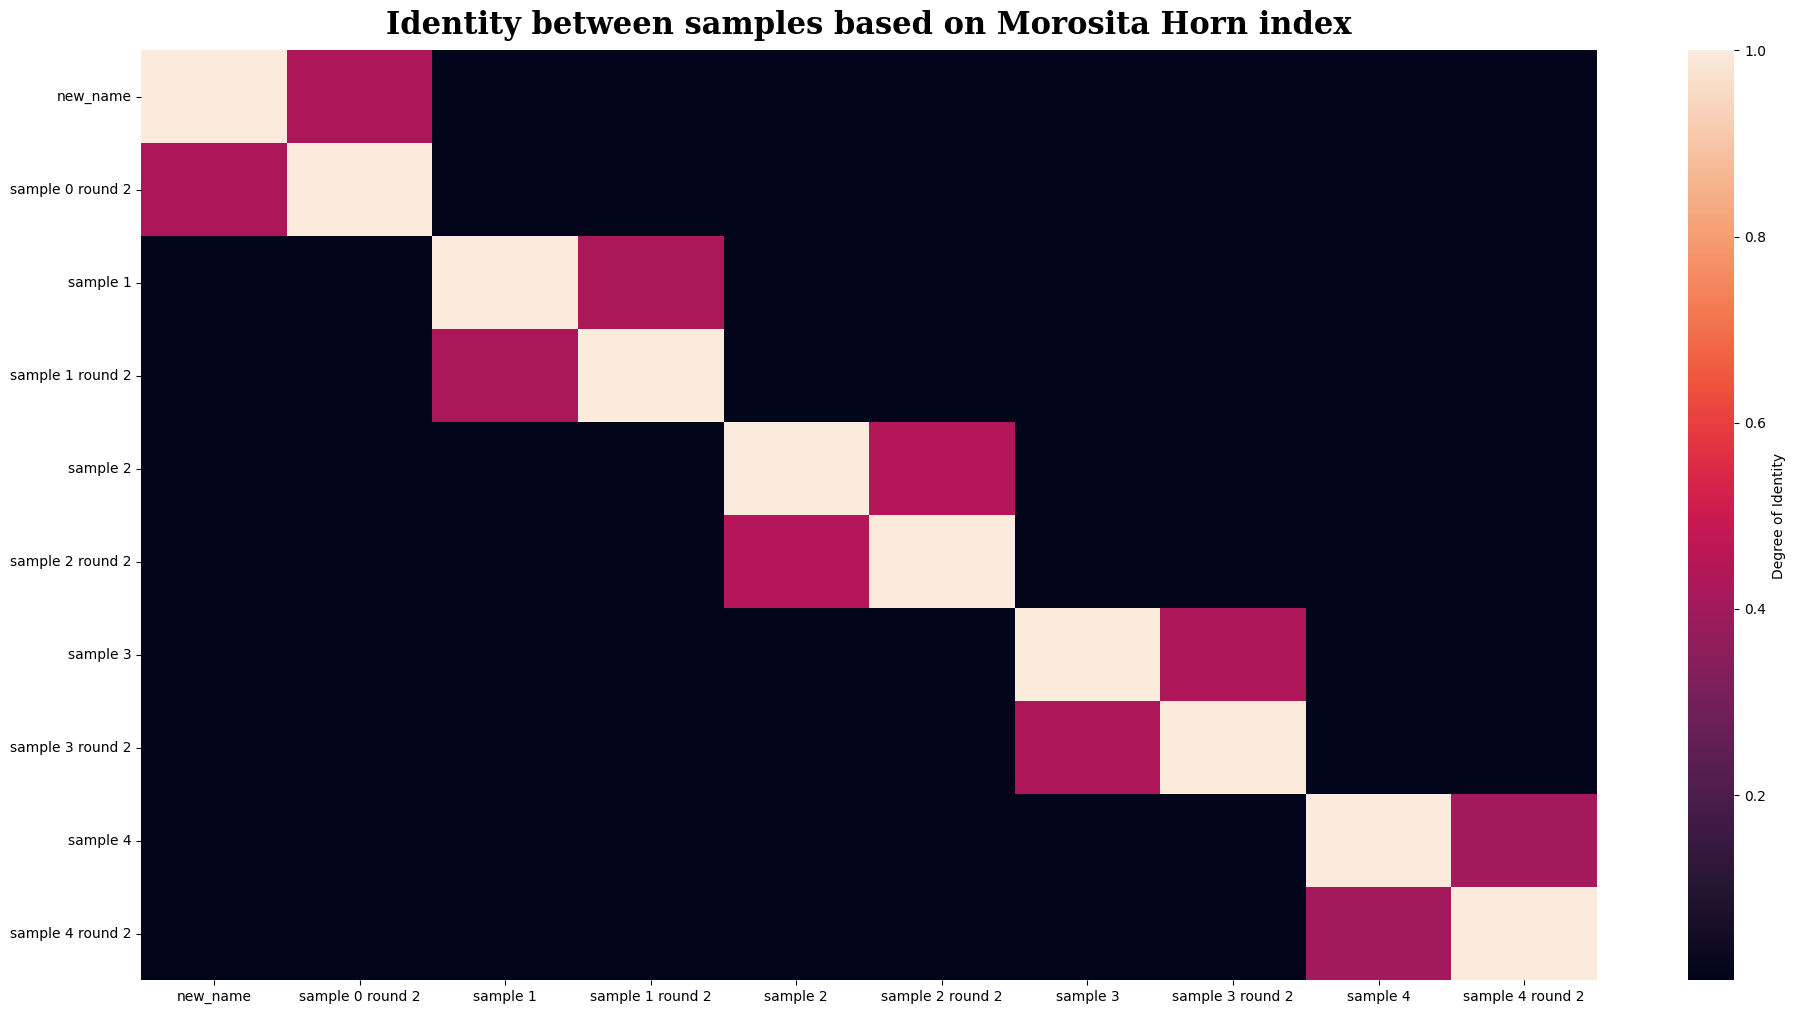

In [62]:
plot.morosita_horn() # some plots do not need any input and you can just call them like this
plot.fig # not necessary when working in console


In [5]:
help(plot.morosita_horn) # get some help by calling help() on the plot you want to use

Help on method morosita_horn in module ExpoSeq.pipeline:

morosita_horn(specific_experiments=False) method of ExpoSeq.pipeline.PlotManager instance
    :param specific_experiments: you can give a list with specific experiments
    :return: Returns a matrix of the identity between your samples based on the Morosita Horn Index



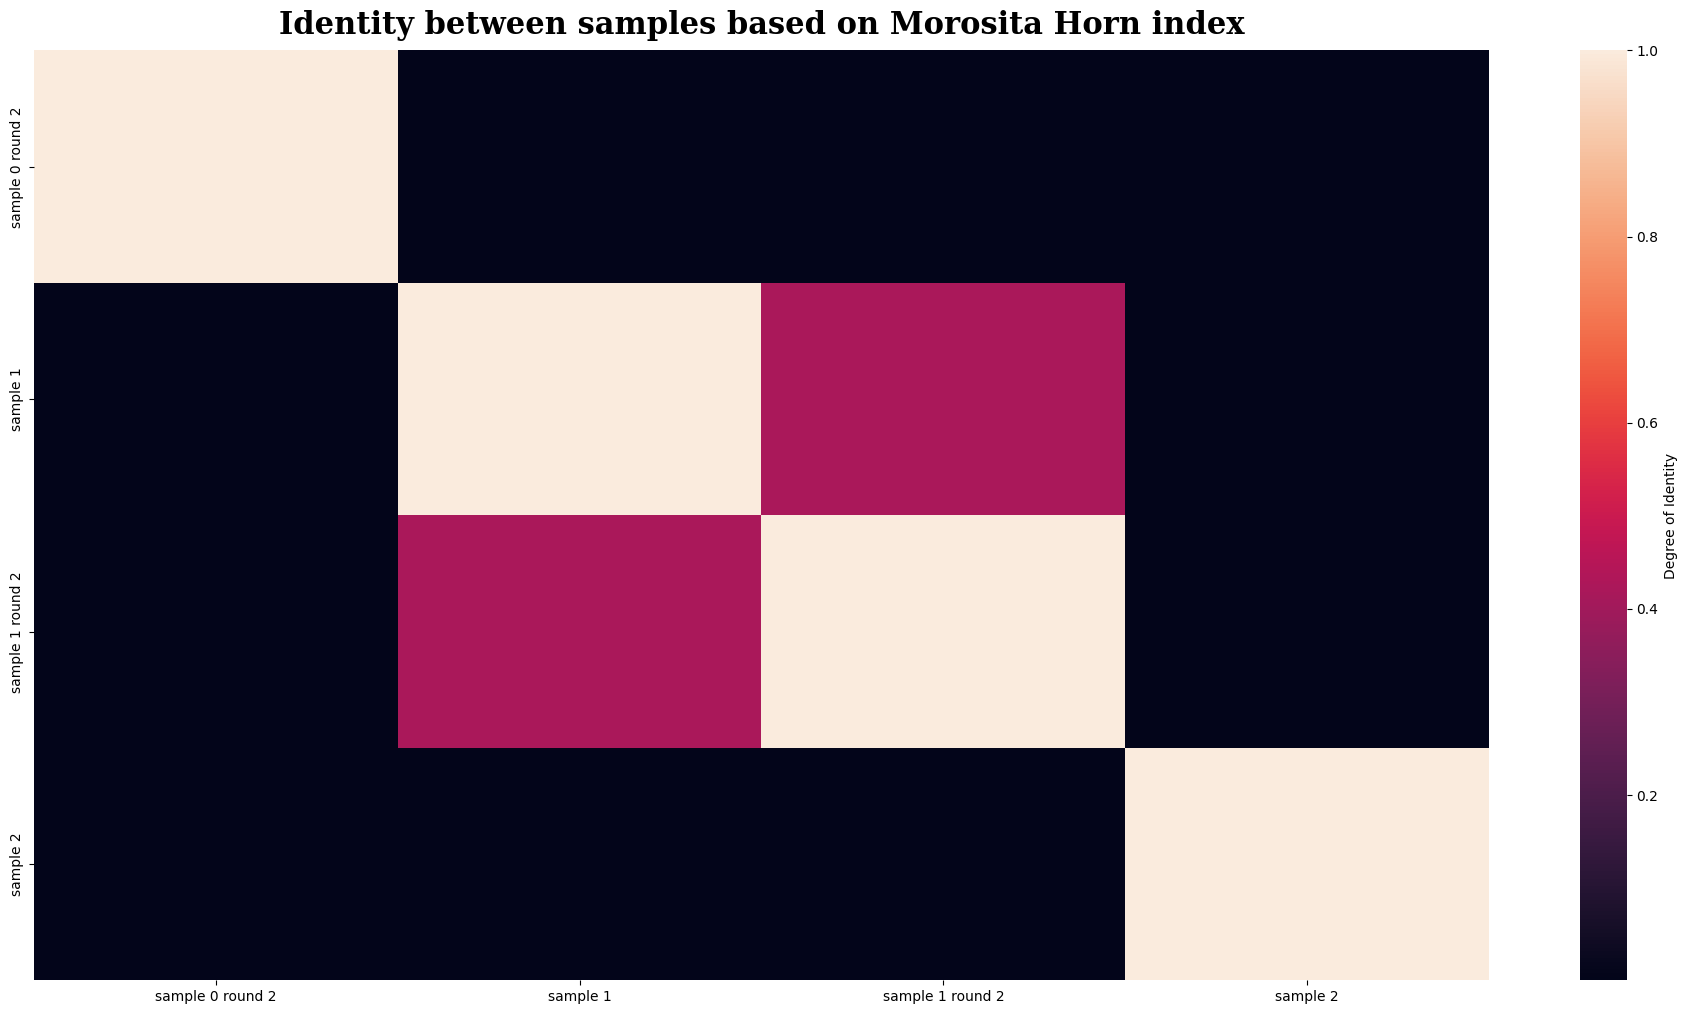

In [59]:
plot.morosita_horn(specific_experiments= ["sample 0", 'sample 0 round 2', 'sample 1', 'sample 1 round 2', 'sample 2',]) # help allows you to see what you can specify in your plot, for instance you can choose specific experiments
plot.fig

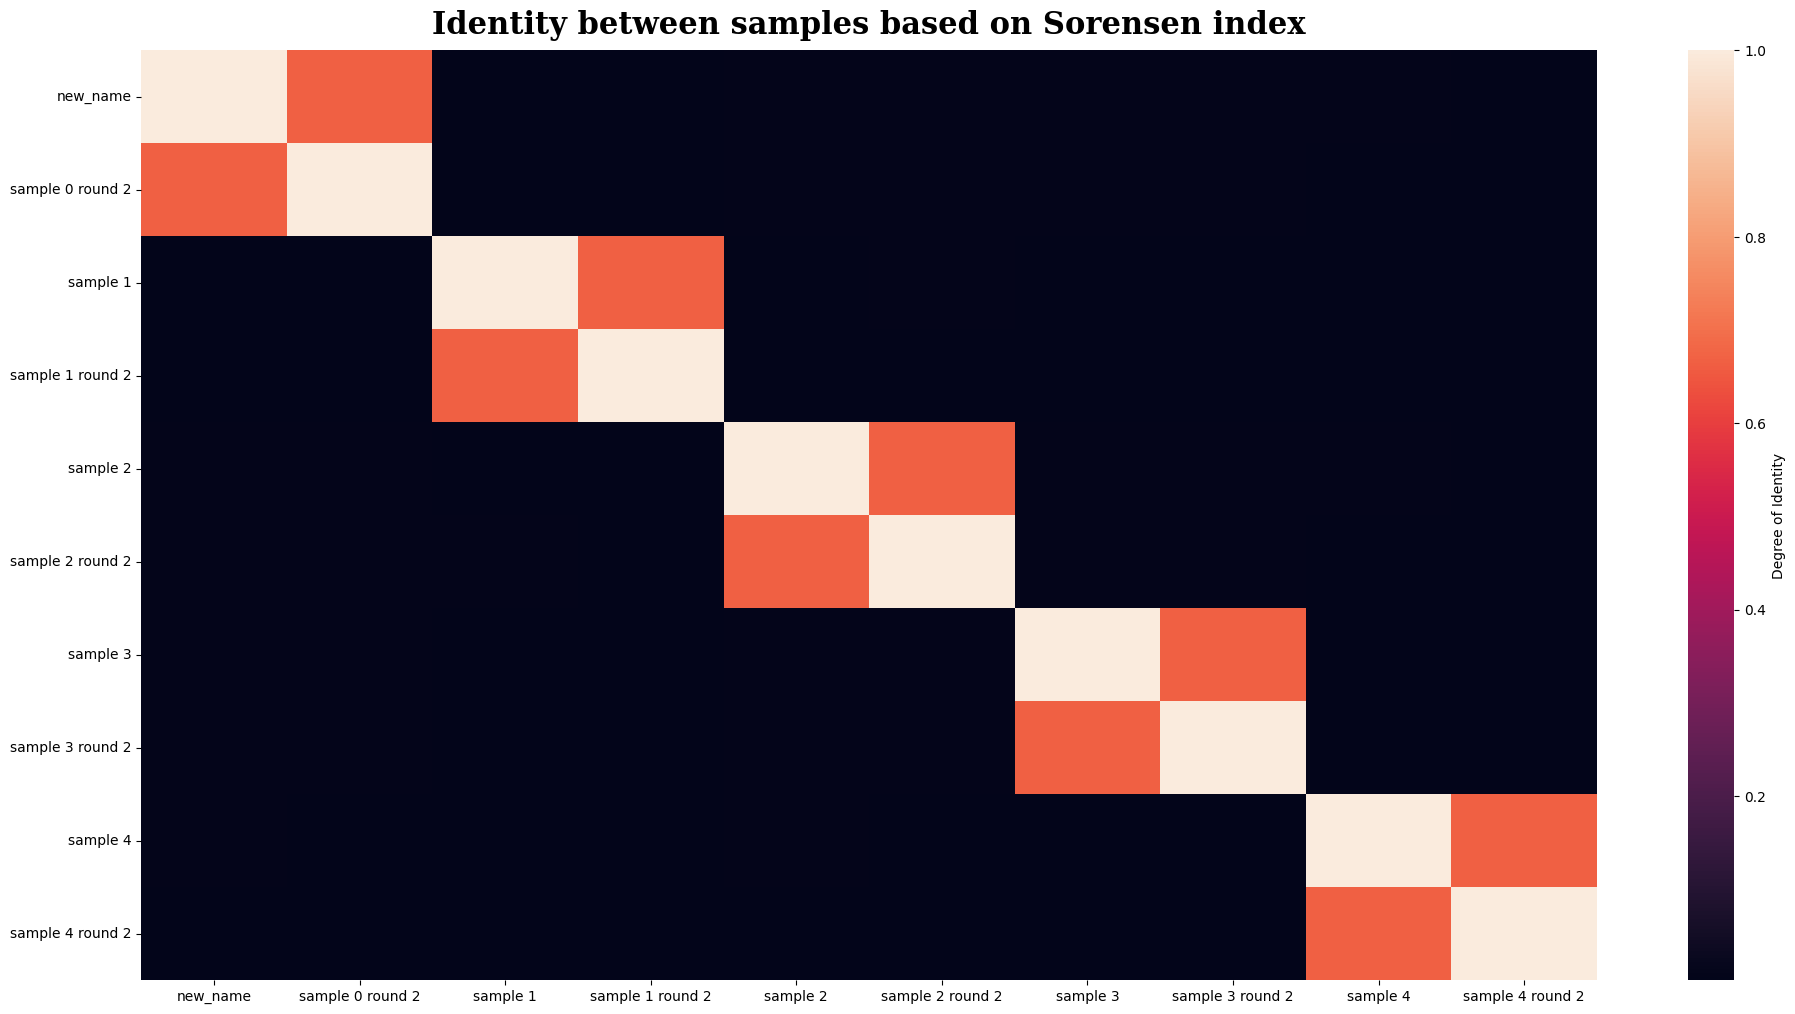

In [60]:
plot.sorensen() # calculate the identity based on the sorensen dice index
plot.fig

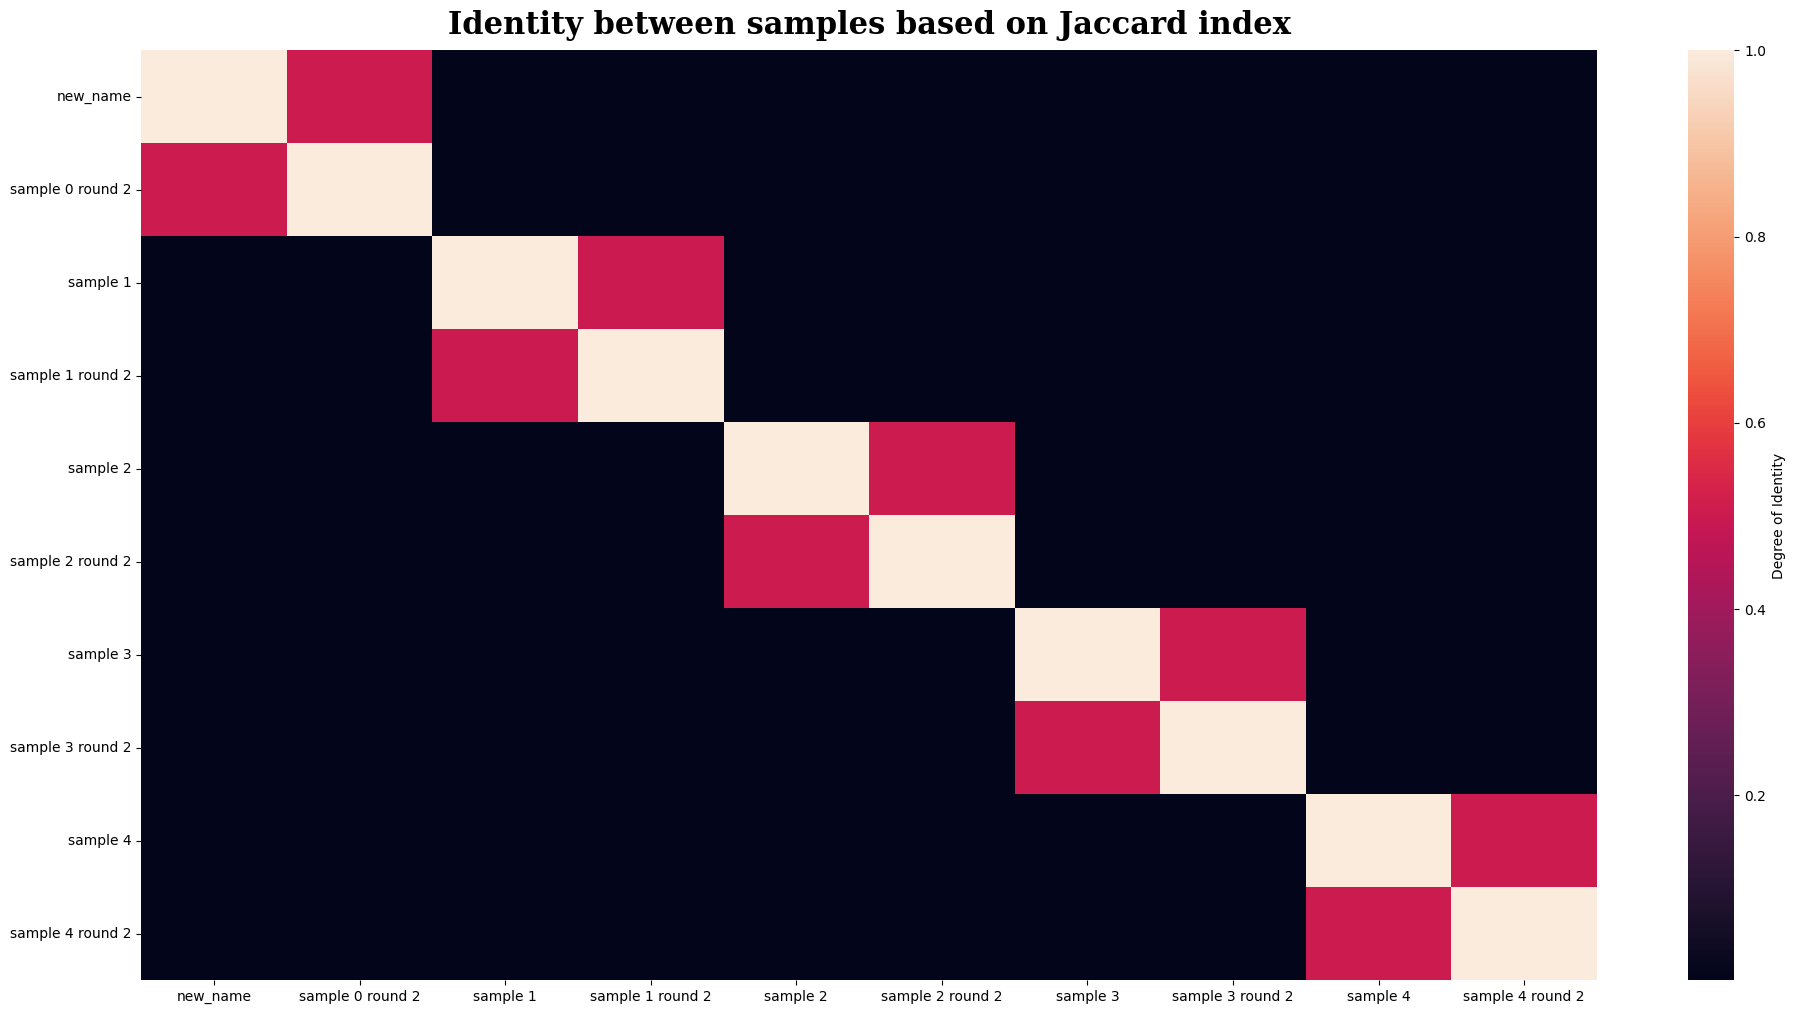

In [61]:
plot.jaccard() # calculate the identity based on the jaccard index
plot.fig

In [46]:
help(plot.tsne_cluster_AG)

Help on method tsne_cluster_AG in module ExpoSeq.pipeline:

tsne_cluster_AG(sample, antigen, antigen_names=True, pca_components=70, perplexity=25, iterations_tsne=2500) method of ExpoSeq.pipeline.PlotManager instance
    :param sample: the sample you would like to analyze
    :param antigen: the toxins you would like to cluster
    :param antigen_names: Default is True. Prints the name of the toxin for the corresponding embedded sequence in the plot
    :param pca_components: optional. Default is 70
    :param perplexity: optional. Default 25
    :param iterations_tsne: optional. Default is 2500
    :return: It first embeds the sequences in a vector space and then clusters them with PCA and TSNE. The sequences with the binding data are processed with the input sequences, to enable the plotting of the binding data.



Explained variance after reducing to 70 dimensions:0.42818351729155774


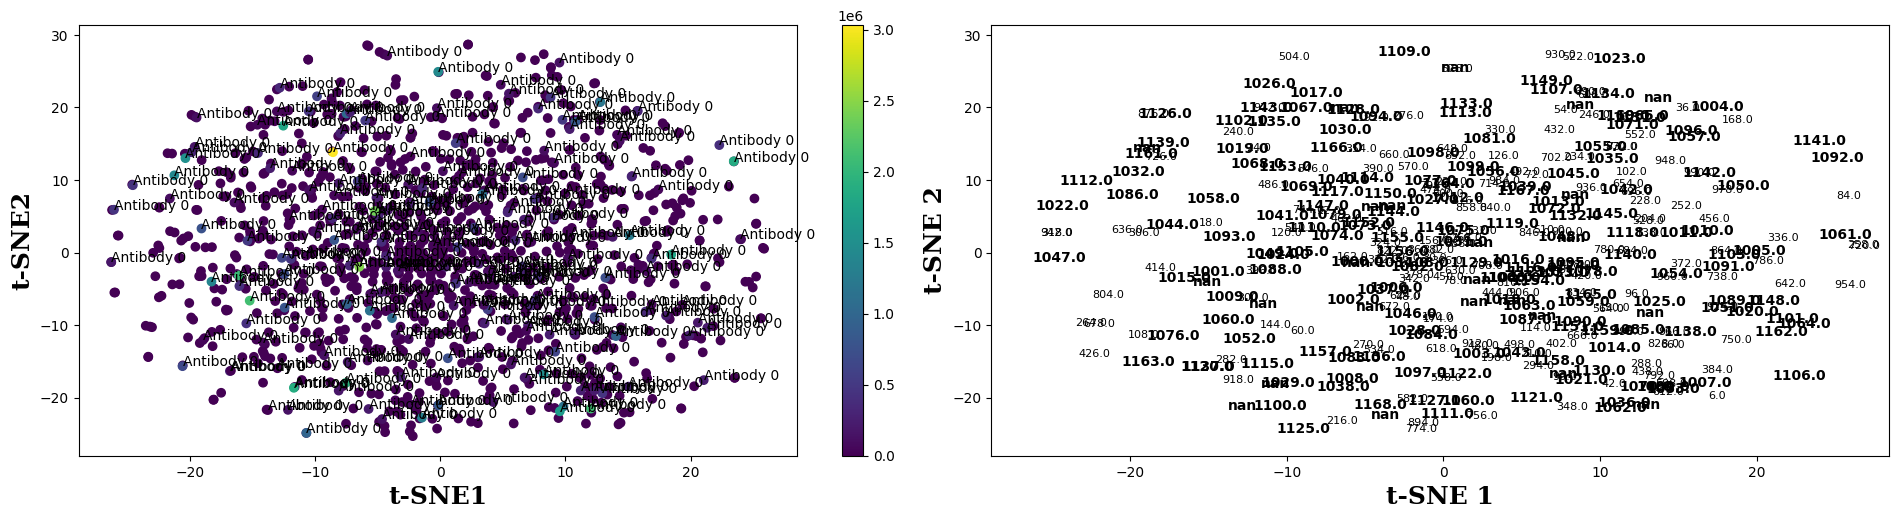

In [47]:
report = plot.tsne_cluster_AG("sample 0", ["Antibody 0"]) 
plot.fig

Explained variance after reducing to 70 dimensions:0.42793396313250626


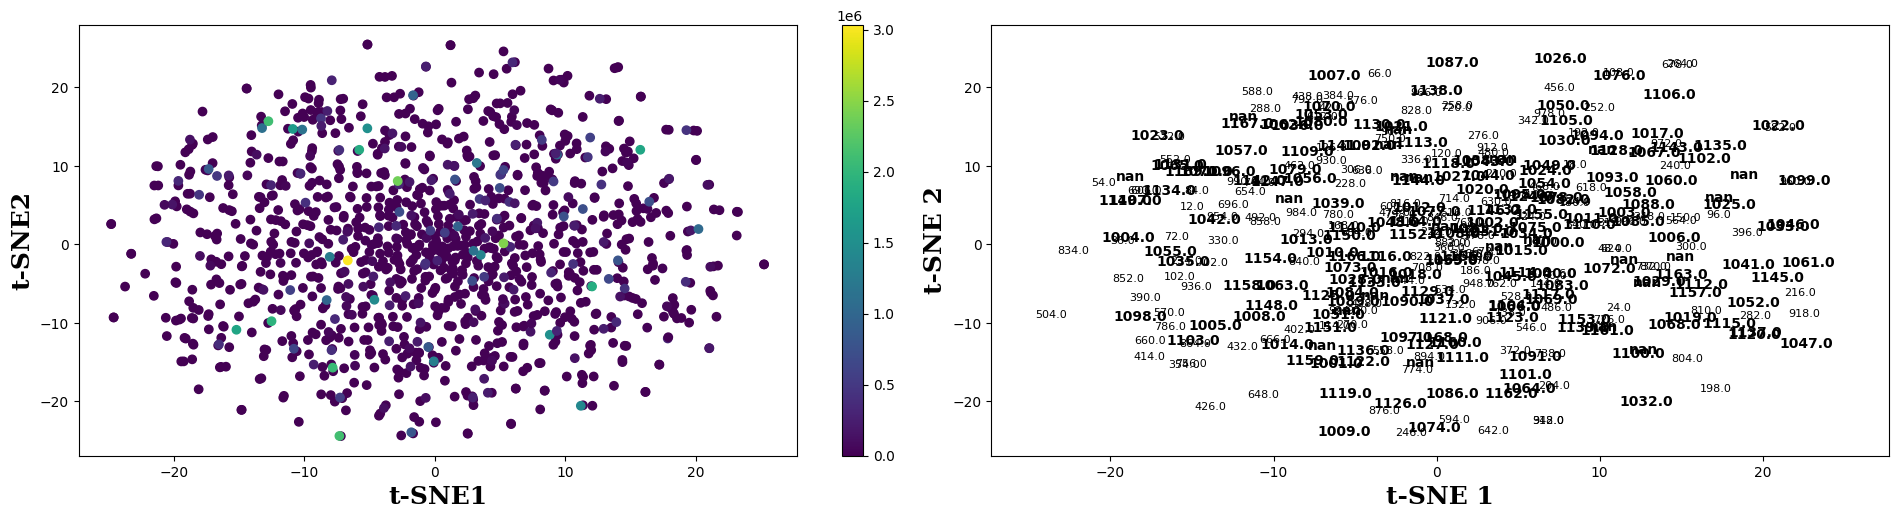

In [48]:
report = plot.tsne_cluster_AG("sample 0", ["Antibody 0"], antigen_names = False, iterations_tsne = 1000) # you can change the iterations of the tsne algorithm but it will reduce the overall accuracy. Also if you set antigen names to False it will not print their names in the first plot.
plot.fig

Explained variance after reducing to 70 dimensions:0.4273328856265643


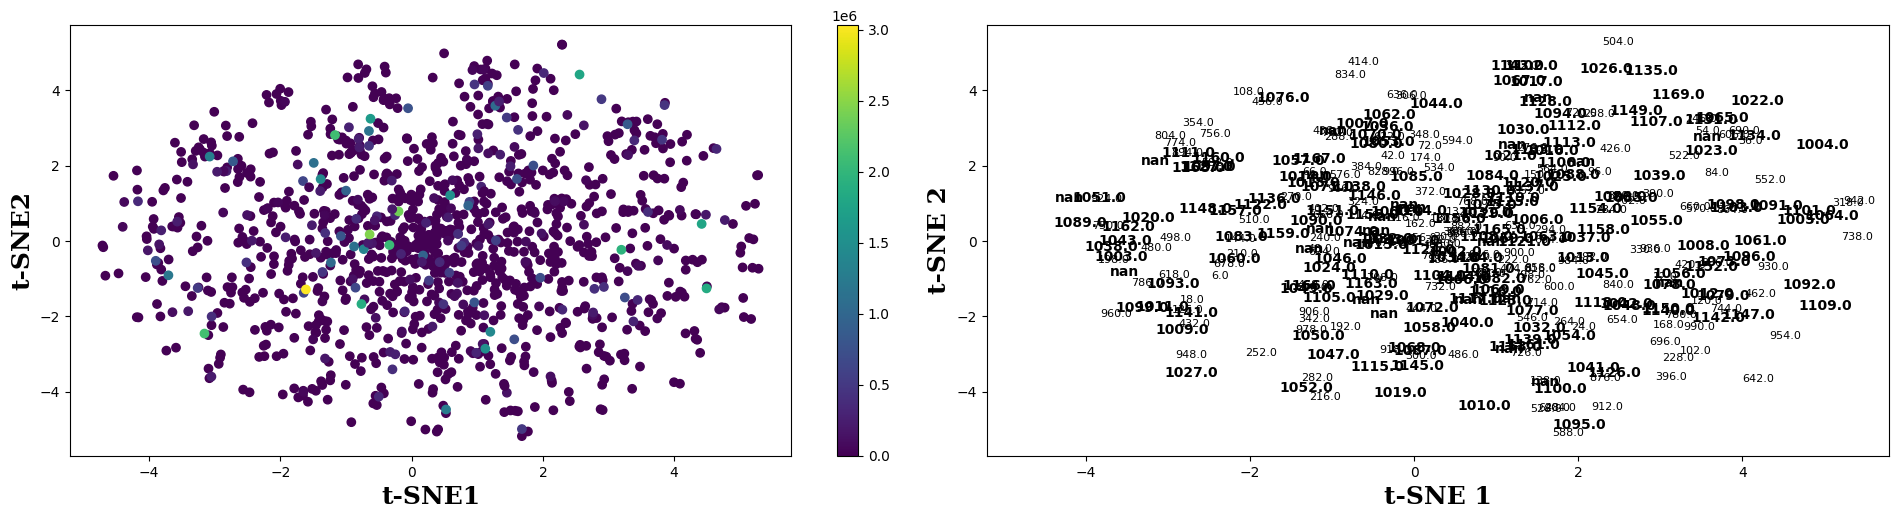

In [49]:
report = plot.tsne_cluster_AG("sample 0", ["Antibody 0"], antigen_names = False, perplexity = 70) # you can change the perplexity value to achieve a more global representation
plot.fig

In [51]:
help(plot.embedding_tsne)

Help on method embedding_tsne in module ExpoSeq.pipeline:

embedding_tsne(samples, strands=True, pca_components=80, perplexity=30, iterations_tsne=2500) method of ExpoSeq.pipeline.PlotManager instance
    :param samples: the samples you would like to compare towards their sequences
    :param strands: Default is True. It means that you will plot a batch of the strands in your plot
    :param pca_components: Default is 80. Has to be applied for better accuracy of t-SNE. You can indirectly change the described variance with this.
    :param perplexity: Default is 30. It roughly determines the number of nearest neighbors that are considered in the embedding. A higher perplexity value results in a more global structure in the low-dimensional embedding, while a lower perplexity value emphasizes local structure. The optimal perplexity value for a given dataset depends on the dataset's intrinsic dimensionality, and it is usually determined by trial and err
    :param iterations_tsne: Default 

0.6286134466657551


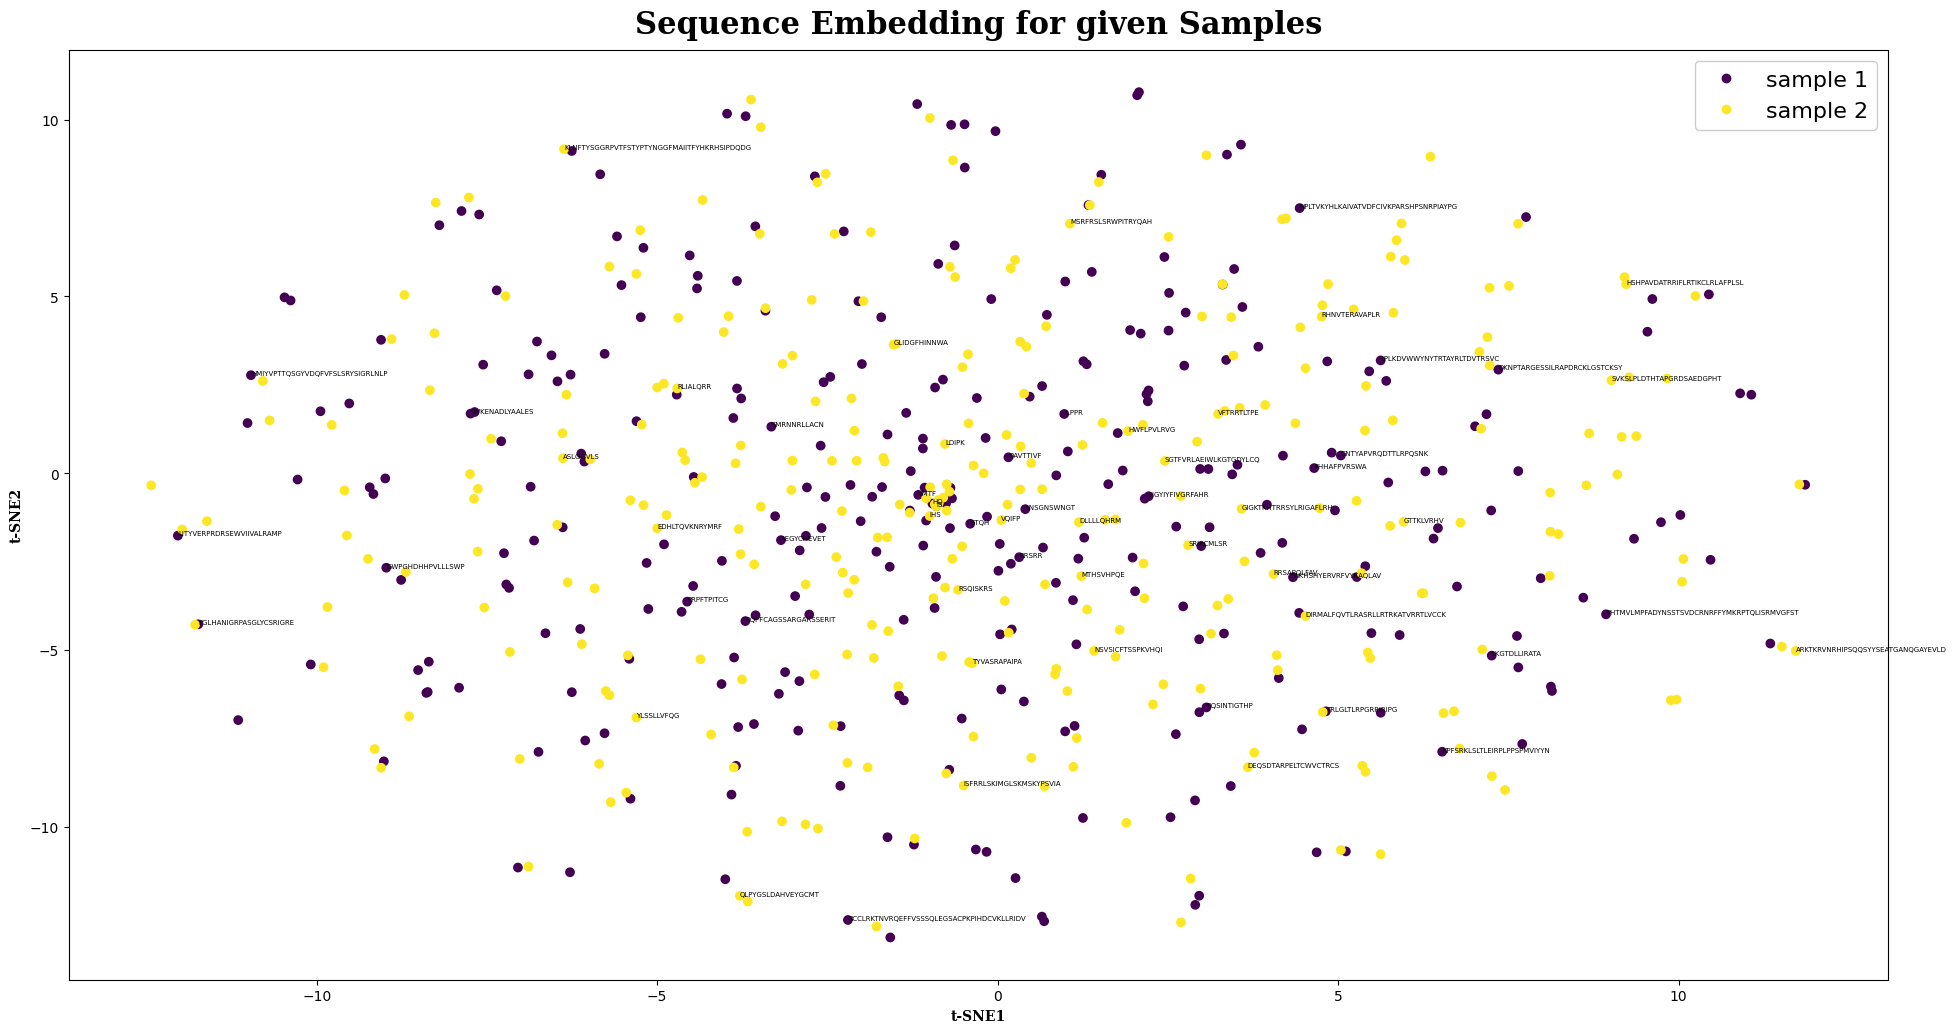

In [66]:
plot.embedding_tsne(["sample 1", "sample 2"]) # get an overview of how your sequences from different samples differ to each other
plot.fig

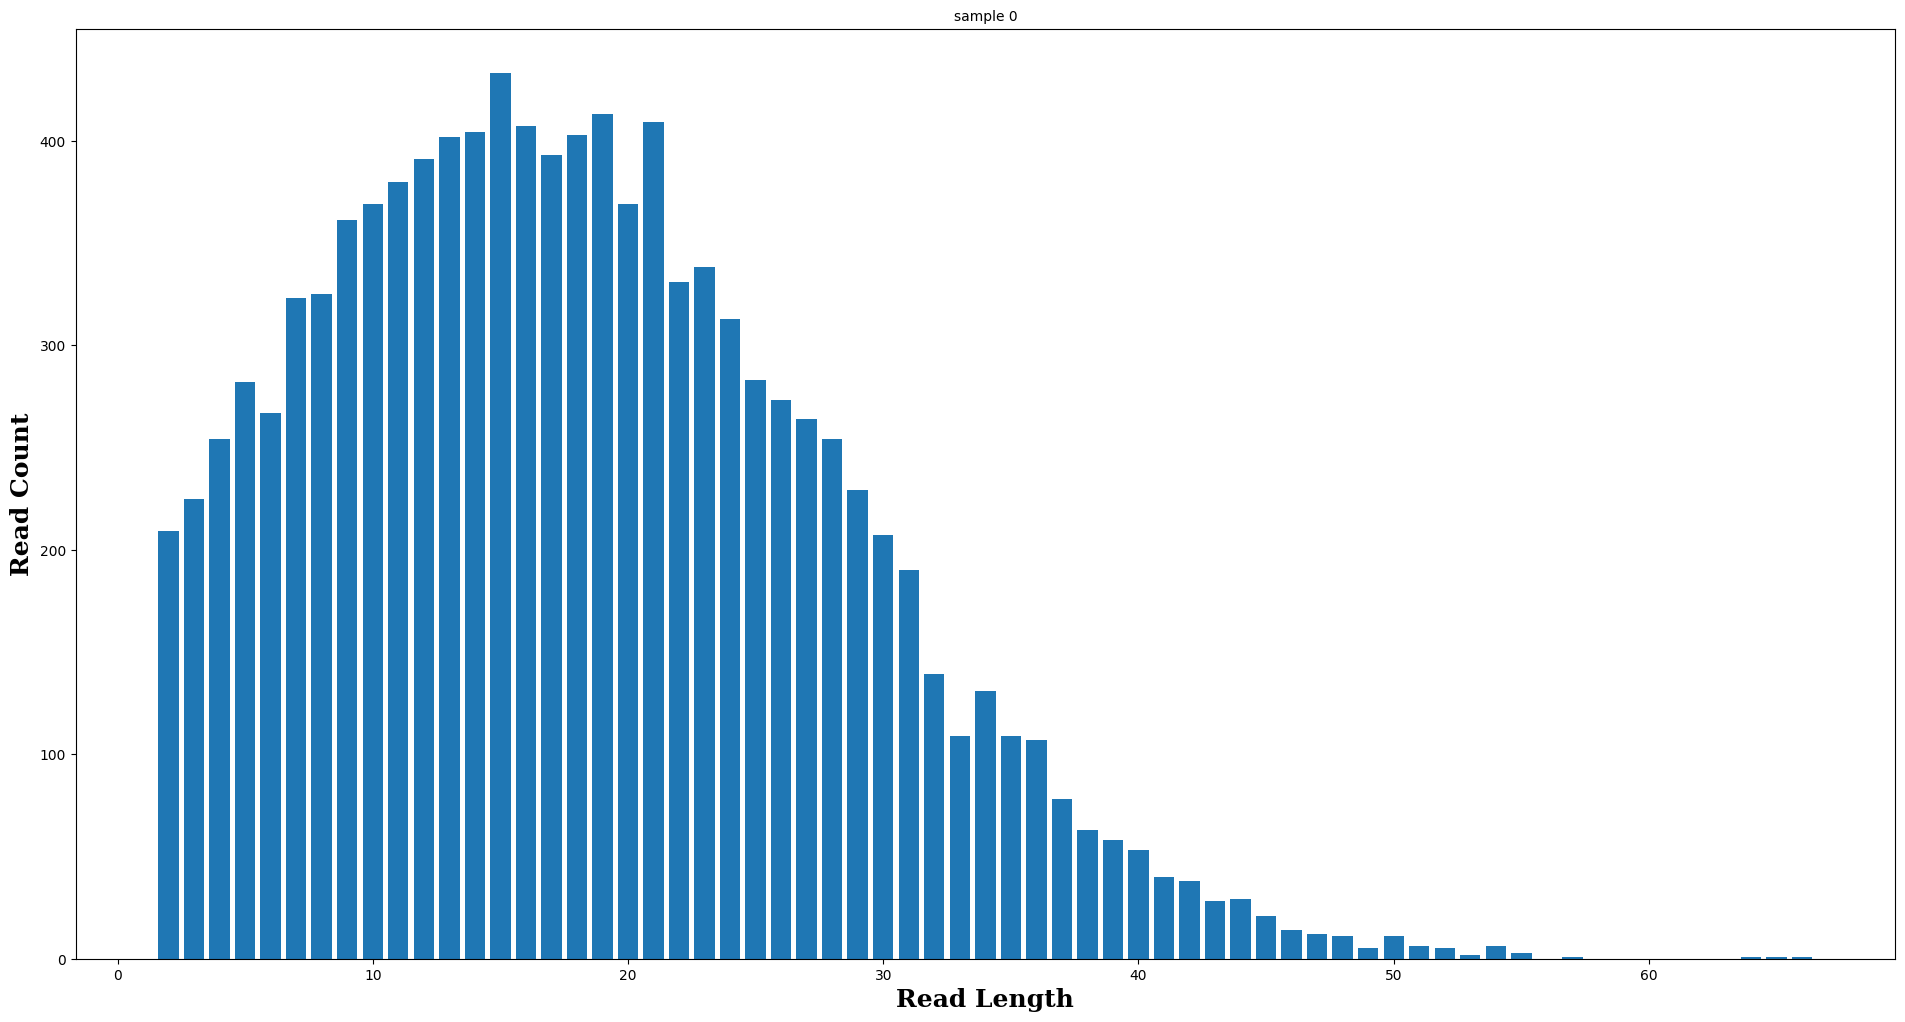

In [53]:
plot.lengthDistribution_single("sample 0")
plot.fig

In [14]:
help(plot.lengthDistribution_multi)

Help on method lengthDistribution_multi in module ExpoSeq.pipeline:

lengthDistribution_multi(num_cols, samples='all') method of ExpoSeq.pipeline.PlotManager instance
    :param num_cols: number of columns you want to have in your figure.
    :param samples: You analyze ExpoSeq samples per default. If you want to analyze specific samples it has to be a list with the corresponding sample names
    :return: Outputs one figurewith one subplot per sample which shows you the distribution of sequence length



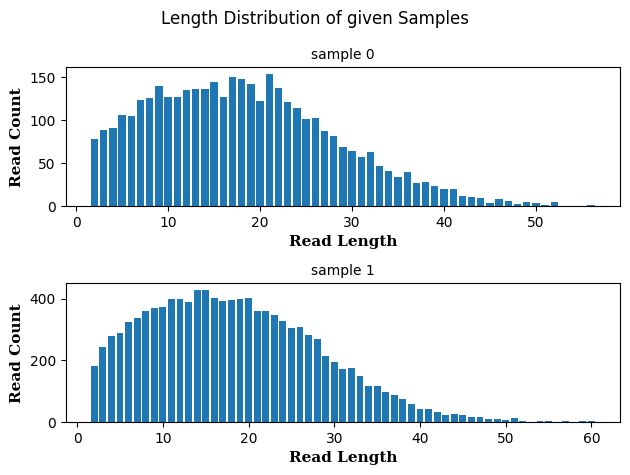

In [16]:
plot.lengthDistribution_multi(num_cols = 1,samples = ["sample 0", "sample 1"]) # change the number of columns if you prefer
plot.fig

In [64]:
help(plot.usqPlot)


Help on method usqPlot in module ExpoSeq.pipeline:

usqPlot(samples) method of ExpoSeq.pipeline.PlotManager instance
    :param samples: you insert a list which contains the sample names
    :return: USQ stands for unique sequences quality and the plot shows you the depth of unique sequences which can be used for evaluating your sequencing quality.



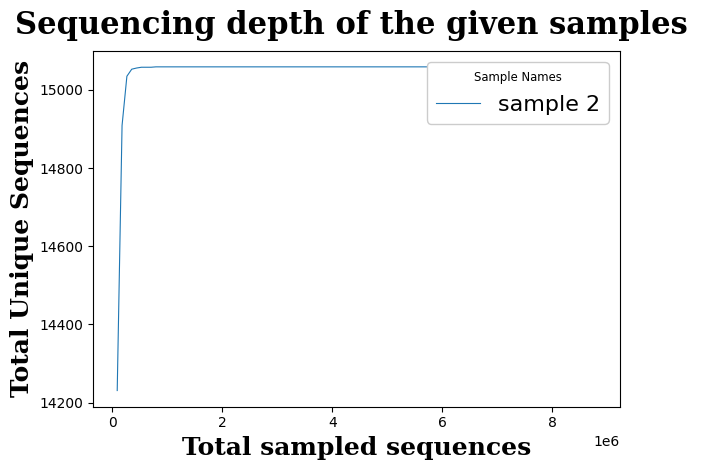

In [4]:
plot.usqPlot(["sample 2"])
plot.fig

In [19]:
help(plot.logoPlot_single)


Help on method logoPlot_single in module ExpoSeq.pipeline:

logoPlot_single(sample, highlight_specific_pos=False, highlight_pos_range=False, chosen_seq_length=16) method of ExpoSeq.pipeline.PlotManager instance
    :param sample: insert the sample name
    :param highlight_specific_pos: optional. you can highlight a specific position
    :param chosen_seq_length: 16 per default. You always analyze online one sequence length! You can change it if you would like to.
    :return: A logo Plot which shows you the composition of aminoacids per position



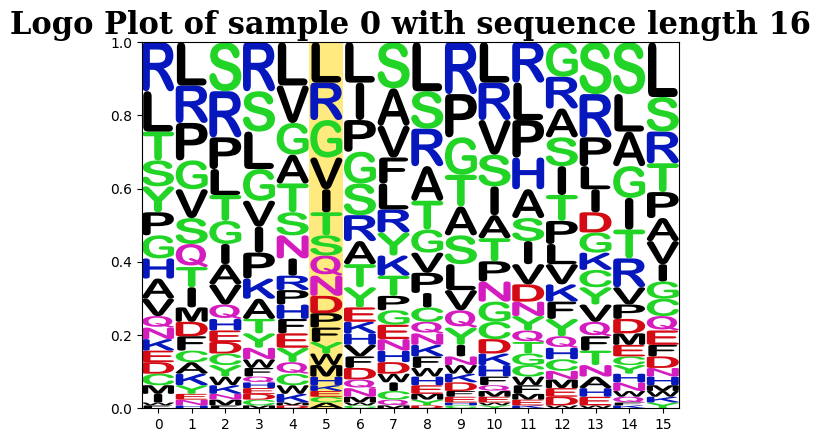

In [20]:
plot.logoPlot_single("sample 0", highlight_specific_pos = 5) # highlight a specific position in your logo plot
plot.fig

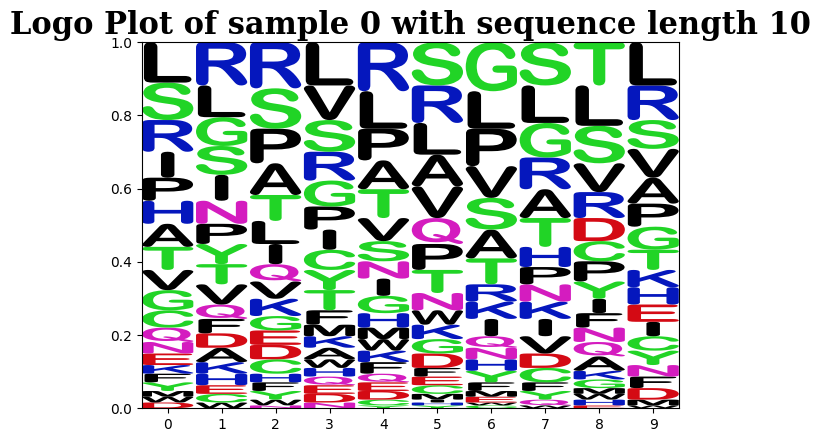

In [21]:
plot.logoPlot_single("sample 0", chosen_seq_length = 10)
plot.fig

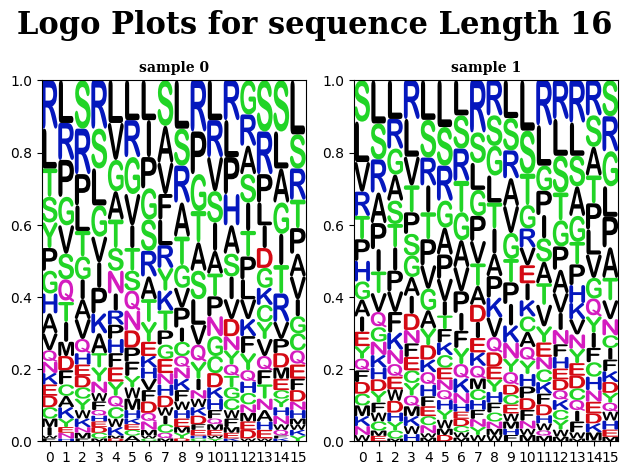

In [22]:
plot.logoPlot_multi(num_cols = 2, samples = ["sample 0", "sample 1"])
plot.fig

In [23]:
help(plot.rel_seq_abundance)

Help on method rel_seq_abundance in module ExpoSeq.pipeline:

rel_seq_abundance(samples, max_levenshtein_distance=0, length_filter=0, batch=3000) method of ExpoSeq.pipeline.PlotManager instance
    :param samples: For a qualitative analysis choose samples from the same panning experiment. Input is a list
    :param max_levenshtein_distance: Default is 0. You can change it to see increased fraction with increased variability of certain sequences
    :param length_filter: Default is 0. You should change it if you change the levenshtein distance. Otherwise your results will be biased.
    :param batch: Default is 3000. The size of the sample which is chosen. The higher it is, the more computational intense.
    :return: Shows you a Bar Plot of the frequences of the most abundant sequences. You can introduce the levenshtein distance to see how the frequency changes with higher variability of the sequences.



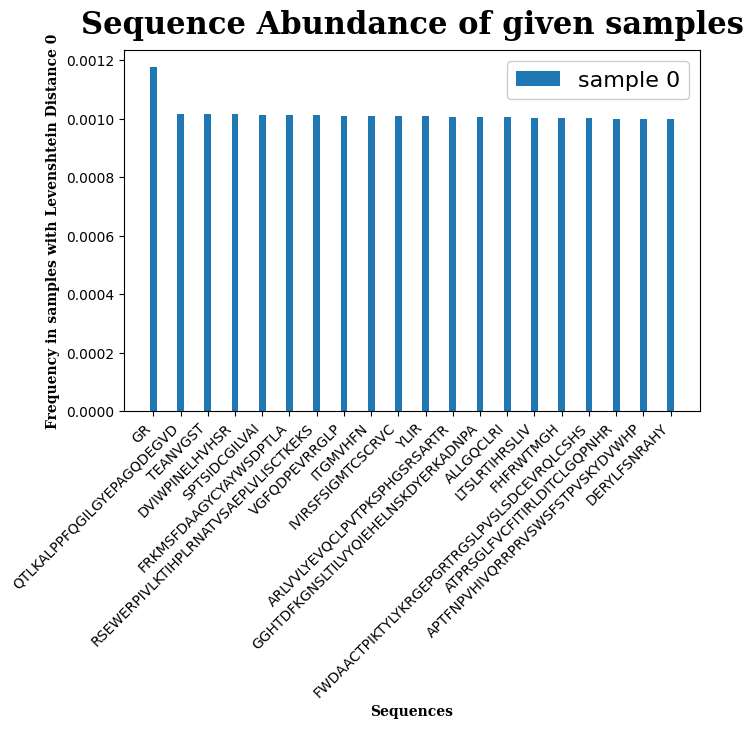

In [24]:
plot.rel_seq_abundance(["sample 0"]
                       )
plot.fig

In [25]:
help(plot.cluster_one_AG)

Help on method cluster_one_AG in module ExpoSeq.pipeline:

cluster_one_AG(antigen, max_ld=1, min_ld=0, specific_experiments=False) method of ExpoSeq.pipeline.PlotManager instance
    :param antigen: is the name of the antigen you would like to analyze
    :param max_ld: optional Parameter where its default is 1. Is the maximum Levenshtein distance you allow per cluster
    :param min_ld: optional Parameter where its default is 0. Is the minimum Levenshtein distance between sequences you allow
    :param specific_experiments: optional Parameter. You can give the names of specific samples in a list if you want
    :return: Creates a figure where sequences are clustered based on Levenshtein distance. Additionally the binding data of the sequences against a specific antigen is given.



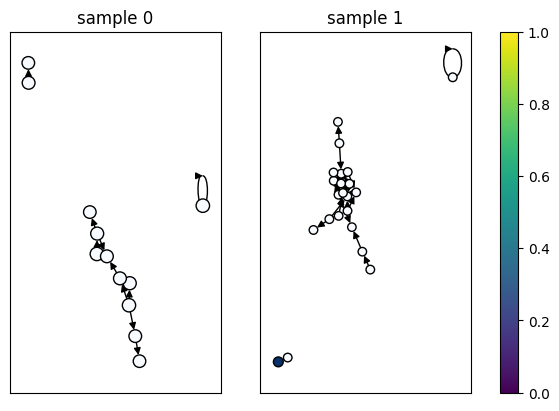

In [26]:
plot.cluster_one_AG("Antibody 1",max_ld = 2, specific_experiments=["sample 0", "sample 1"])
plot.fig

In [27]:
help(plot.basic_cluster)

Help on method basic_cluster in module ExpoSeq.pipeline:

basic_cluster(sample, max_ld=1, min_ld=0, second_figure=False) method of ExpoSeq.pipeline.PlotManager instance
    :param sample: type in a sample name you want to analyze
    :return:



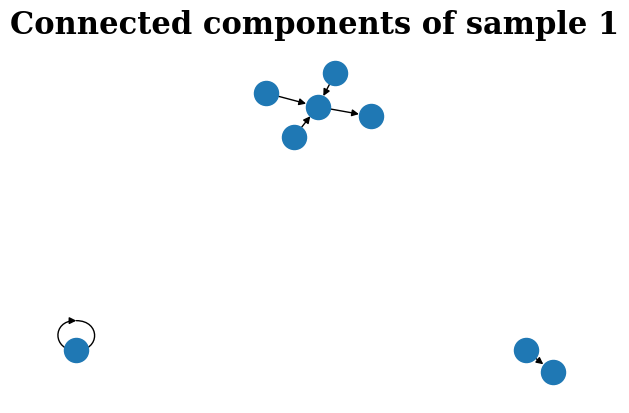

In [29]:
plot.basic_cluster("sample 1")
plot.fig

In [30]:
help(plot.aa_distribution)

Help on method aa_distribution in module ExpoSeq.pipeline:

aa_distribution(sample, region, protein=True) method of ExpoSeq.pipeline.PlotManager instance
    :param sample: The sample you would like to analyze
    :param region: the region you would like to analyze
    :param protein: Default True. If you would like to analyze nucleotide sequences, set it to False
    :return: Returns a plot which shows the amino acid distribution in the given sequence range.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


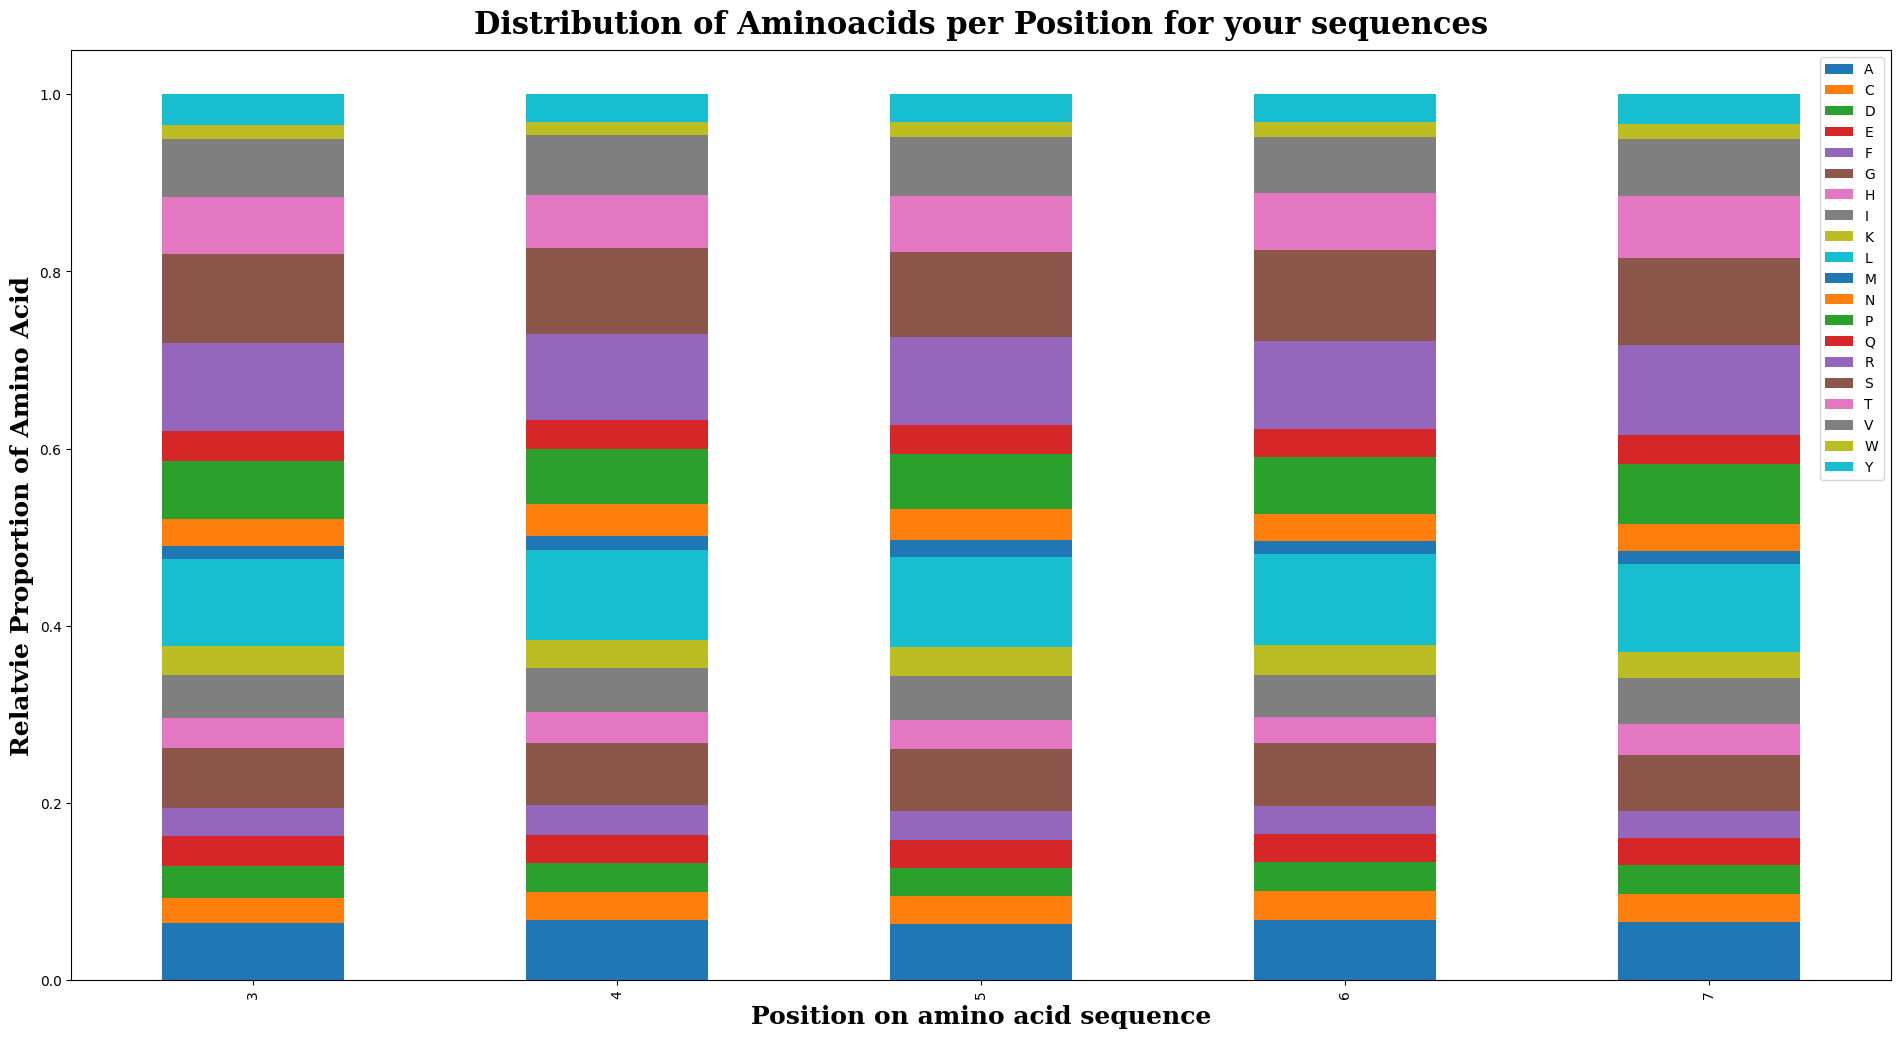

In [54]:
plot.aa_distribution("sample 0", [3,7])
plot.fig
import matplotlib.pyplot as plt
plt.tight_layout()
plot.fig

In [32]:
help(plot.change_experiment_names)

Help on method change_experiment_names in module ExpoSeq.pipeline:

change_experiment_names(specific=None, change_whole_dic=False) method of ExpoSeq.pipeline.PlotManager instance
    :param specific: optional parameter. You can use this function to change the names of a specific sample.
    :param change_whole_dic: optional Parameter. The renaming can be done by using a dictionary and map it to the labels. You can change multiple or all labels by adding the new dictionary for this parameter.
    :return:You can use this function to change the name of your samples. Thus, you can change the labels of your plots.



In [55]:
plot.change_experiment_names("sample 0")


In [56]:
plot.print_samples() 

['new_name', 'sample 0 round 2', 'sample 1', 'sample 1 round 2', 'sample 2', 'sample 2 round 2', 'sample 3', 'sample 3 round 2', 'sample 4', 'sample 4 round 2']


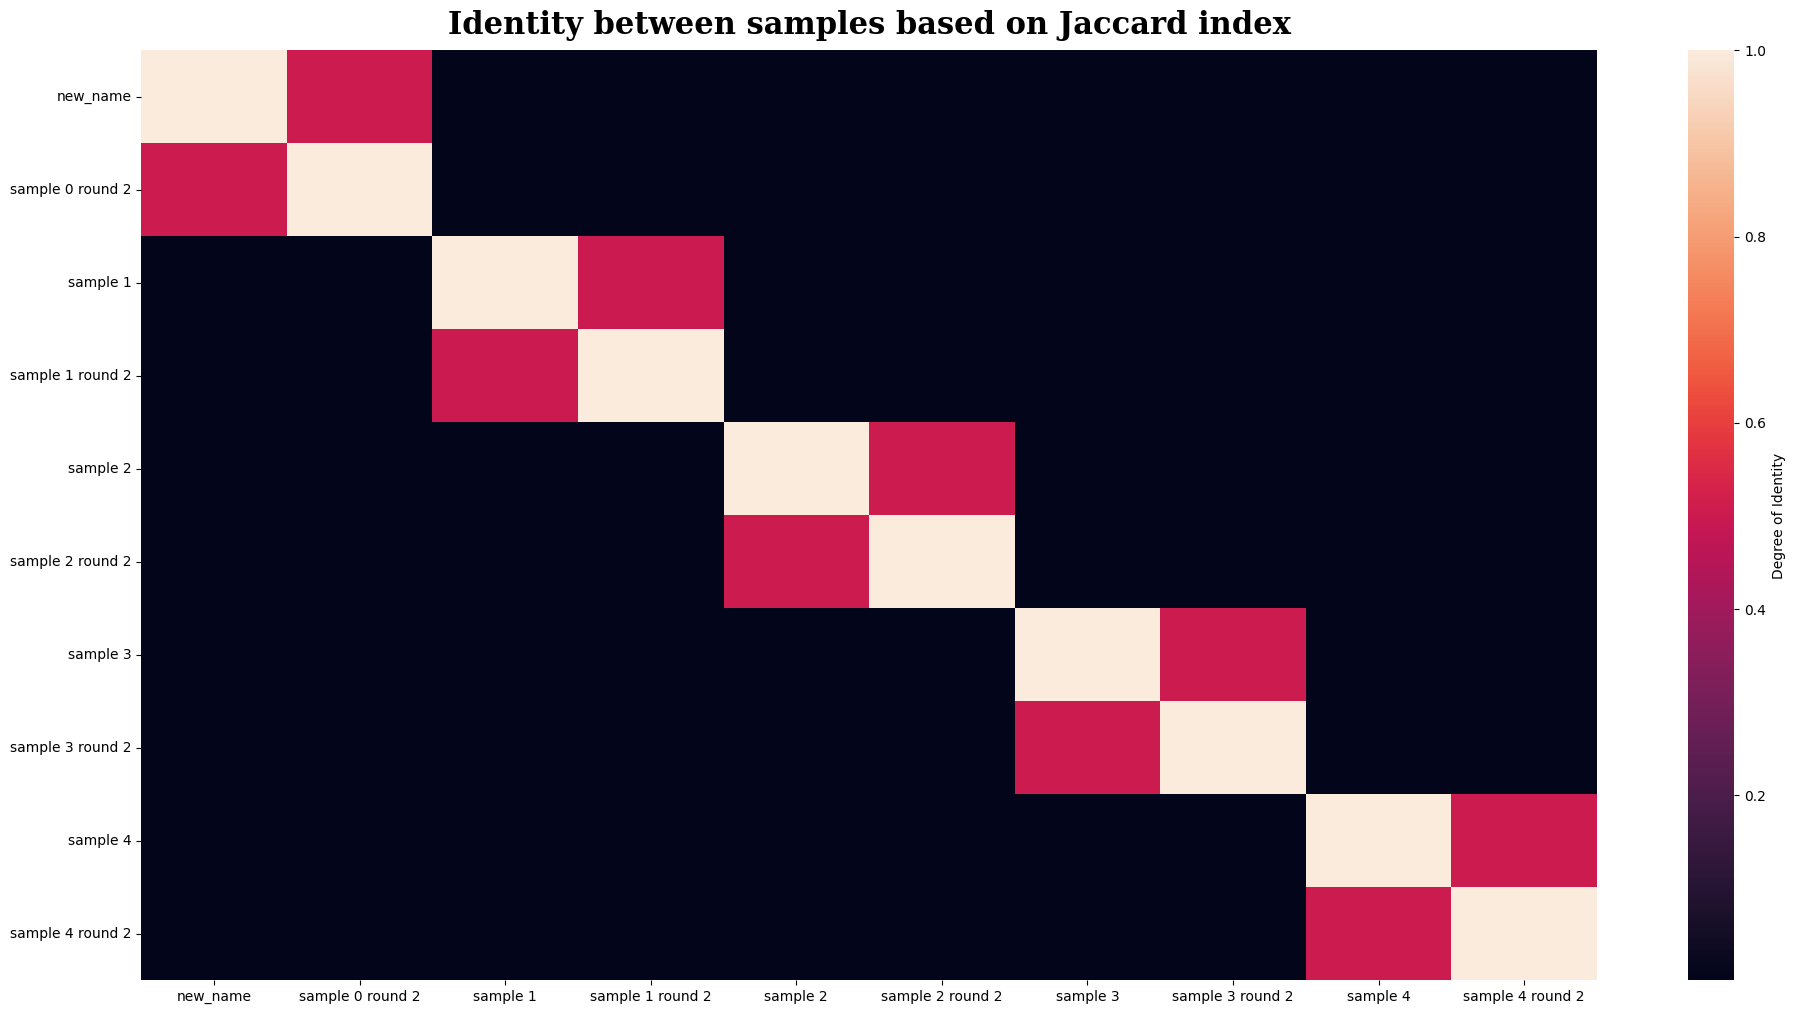

In [57]:
plot.jaccard(

)
plot.fig

In [37]:
help(plot.save)

Help on method save in module ExpoSeq.pipeline:

save(name=False) method of ExpoSeq.pipeline.PlotManager instance
    :return: can be used to save your plots. It will ask you automatically for the directory where you want to save it



In [5]:
plot.binding_data.head(10) # you can see that the pipeline automatically merges the binding data for certain epitopes to the sanger sequenced sequences (here they are just randomized). However, these can be used for clustering, for instance in the sequence embedding. 

,aaSeqCDR3,Antibody 0,Antibody 1
0,IFPWVHIINSLGSRLRNVT,4.964628e+06,NaN
1,HLMAELDEALRVSIGRAPGEHS,1.067622e+06,NaN
2,GLYLDTQPSHQN,2.451624e+06,NaN
3,GGLQEASSSAVLSRHM,8.211708e+05,NaN
4,RAQLEPYAQS,3.730483e+05,NaN
5,SCARRSDCWSTVEYRLD,1.616182e+06,1.616182e+06
6,ARIVAVRKYLLTQSAGHGTYS,2.025362e+05,2.025362e+05
7,LSDLRIGGRYLTTRTTRAKPVNGTGV,1.510387e+06,1.510387e+06


: 

In [ ]:
plot.binding